# 「電車線定規検査記録」をデータベース化する

ライブラリの読み込み

In [18]:
%matplotlib inline

# ライブラリのインポート
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ファイル名の取得

In [32]:
file_path = './DB/'
file_names = os.listdir(file_path)

print(file_names)

['01.電車線定規検査記録\u3000（里西上）R03.11末付け.xlsx', '01\u3000入出庫点検１番線 R03.07末付け.xls', 'Train_line_1.csv', 'Train_line_2.csv', '~$01.電車線定規検査記録\u3000（里西上）R03.11末付け.xlsx']


EXCELファイルのデータフレームへの取り込み（ヘッダ部スキップ、読み込み列指定、ヘッダ変更）

In [33]:

file_name = file_names[0]

excel_path = file_path + file_name
header = ['No.', 'name', 'R_h', 'S_h', 'T_h', 'R_d', 'S_d', 'T_d']

if file_name[-4:] == '.xls':
    sheet_name = 'R03年度'
    df = pd.read_excel(excel_path, sheet_name=sheet_name, 
                   skiprows=11, usecols=[1, 2, 4, 6, 8, 10, 12, 14], names=header, header=None)
    
if file_name[-4:] == 'xlsx':
    sheet_name = 'R03年'
    df = pd.read_excel(excel_path, sheet_name=sheet_name, 
                   skiprows=11, usecols=[0, 1, 3, 5, 7, 9, 11, 13], names=header, header=None)

    
df

,No.,name,R_h,S_h,T_h,R_d,S_d,T_d
0,1.0,里上００１,-1.0,1.0,0.0,-4.0,-3.0,-1.0
1,2.0,里上００２,2.0,3.0,1.0,2.0,3.0,2.0
2,3.0,里上００３,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,里上００４,0.0,0.0,2.0,0.0,1.0,0.0
4,5.0,里上００５,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
309,310.0,里上３１０,0.0,2.0,-1.0,0.0,0.0,0.0
310,311.0,里上３１１,0.0,0.0,-1.0,0.0,0.0,-1.0
311,312.0,里上３１２,0.0,0.0,0.0,-1.0,-1.0,-1.0
312,313.0,里上３１３,0.0,1.0,-1.0,0.0,-2.0,-1.0


空白行の削除

In [34]:
df2 = df.dropna(how='all')
df2

,No.,name,R_h,S_h,T_h,R_d,S_d,T_d
0,1.0,里上００１,-1.0,1.0,0.0,-4.0,-3.0,-1.0
1,2.0,里上００２,2.0,3.0,1.0,2.0,3.0,2.0
2,3.0,里上００３,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,里上００４,0.0,0.0,2.0,0.0,1.0,0.0
4,5.0,里上００５,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
308,309.0,里上３０９,1.0,1.0,0.0,-1.0,0.0,-1.0
309,310.0,里上３１０,0.0,2.0,-1.0,0.0,0.0,0.0
310,311.0,里上３１１,0.0,0.0,-1.0,0.0,0.0,-1.0
311,312.0,里上３１２,0.0,0.0,0.0,-1.0,-1.0,-1.0


<AxesSubplot:>

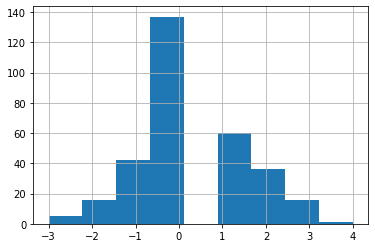

In [35]:
df2['R_h'].hist(bins=9)

<AxesSubplot:>

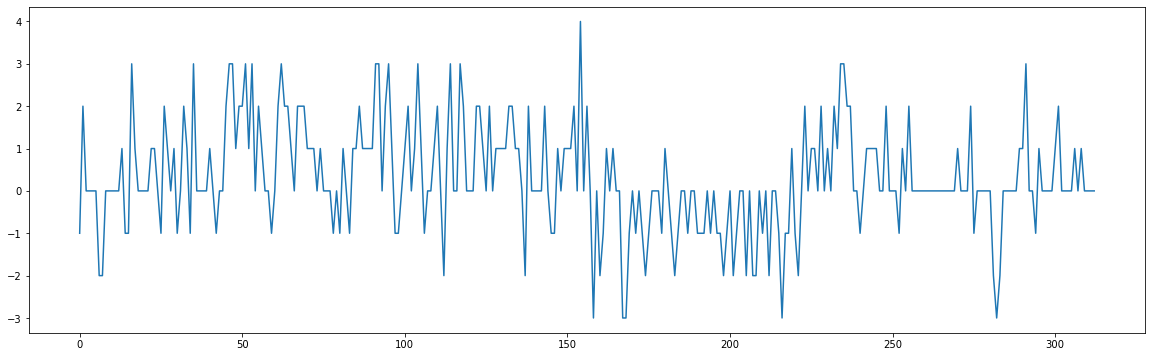

In [30]:
df2['R_h'].plot(figsize=(20, 6))